# **Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


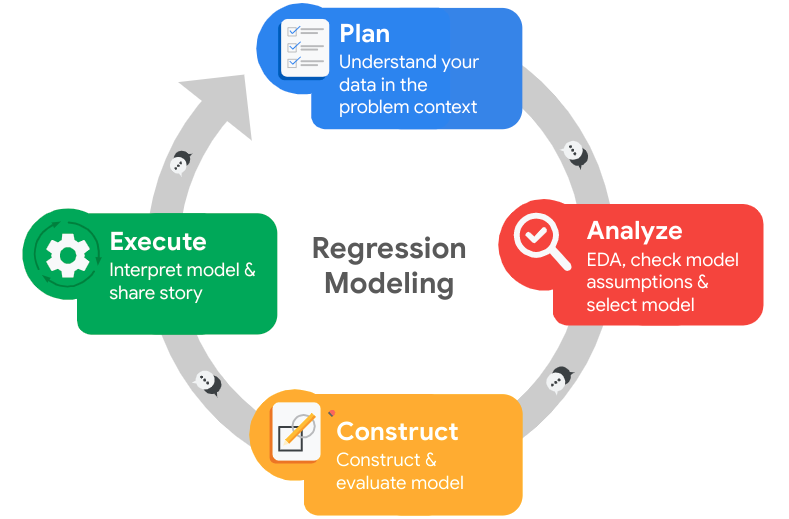

## **Pace: Plan Stage**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Our goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If we can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize with the HR dataset

The dataset that we'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# IMPORT PACKAGES

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For saving models
import pickle

#For metrics and helpful function
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score

# For data modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance


# For displaying all columns in dataframes
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

### Load dataset



In [2]:
# Load dataset into a dataframe

df0 = pd.read_csv("/Users/tarahanni/Documents/Data/Python/HR_comma_sep 2.csv")

# Display first few rows of the dataframe

df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand the variables
- Clean the dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Based on the info, we have no missing values and we will not change the column data types.

Next, we will rename the column to make it concise, check for missing data, duplicates, and also outliers.

### Gather descriptive statistics about the data

In [4]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed

df0 = df0.rename(columns={'Department': 'department',
                    'Work_accident': 'work_accident',
                   'time_spend_company': 'tenure',
                   'average_montly_hours': 'average_monthly_hours'})

# Display all column names after the update

df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

In [7]:
# Check for missing values 

df0.isna().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

In [8]:
# Check for duplicates

df0.duplicated().sum()


3008

In [9]:
# Inspect some rows containing duplicates as needed

df0[df0.duplicated()].head(10)



,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


The above output shows the first ten occurences of rows that are duplicated farther down in the dataframe. We could perform a likelihood analysis by essentially applying Bayes' theorem and multiplying the probabilities of finding each value in each column, but this does not seem necessary. 

With several continuous variables across 10 columns, it seems very unlikely that these observations are legitimate. You can proceed by dropping them.

In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')


# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

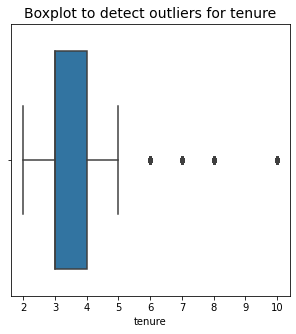

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers

plt.figure(figsize =(5,5))
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.title('Boxplot to detect outliers for tenure', fontsize=14)
sns.boxplot(x=df1['tenure'])
plt.show()



The boxplot above shows that there are outliers in the `tenure` variable. 

It would be helpful to investigate how many rows in the data contain outliers in the `tenure` column.

In [12]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

# Determine the number of rows containing outliers in 'tenure'

# Compute the 25th percentile value 
percentile25 = df1['tenure'].quantile(0.25)

# Compute the 75th percentile value
percentile75 = df1['tenure'].quantile(0.75)

# Compute the interquartile range
iqr = percentile75 - percentile25

# Define the upper and lower limit for non-outlier values
lower_limit = percentile25 - 1.5 * iqr
upper_limit = percentile75 + 1.5 * iqr
print('Lower limit:', lower_limit)
print('Upper limit:', upper_limit)


# Identify subset of data containing outliers
outliers = df1[(df1['tenure'] < lower_limit) | (df1['tenure'] > upper_limit)]

# Count number of rows that containing outliers
print('Number of rows in the data containing outliers: ', len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers:  824


Certain types of models are more sensitive to outliers than others. When we get to the stage of building our model, consider whether to remove outliers, based on the type of model we decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())
print()

# Get percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

We can start by creating histogram of `number_project` column, comparing employees who stayed versus those who left.


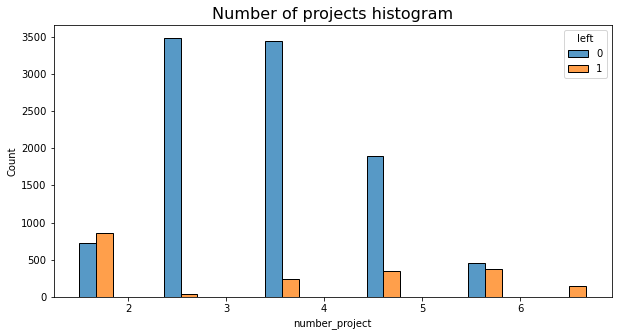

In [14]:
# Create histogram
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2)
ax.set_title('Number of projects histogram', fontsize='16')
plt.show()

From the histogram above we can conclude that employees with 7 projects have left the company and none have stayed.

Next, we will build a stacked boxplot to show the distribution of average_monthly_hours for `number_projects`, comparing the distribution of employees who stayed and employees who left.

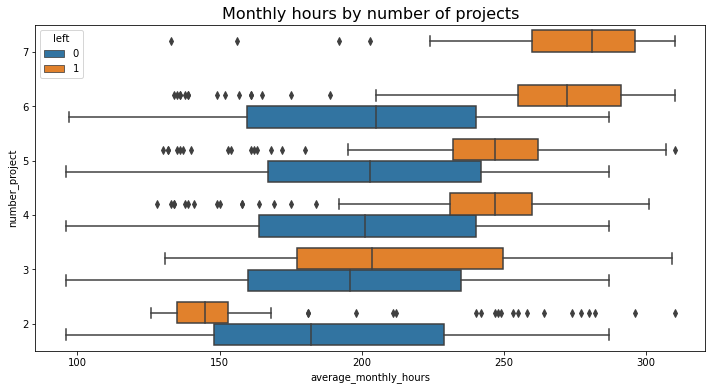

In [15]:
# Create a boxplot

plt.figure(figsize=(12,6))
ax = sns.boxplot(data = df1, x='average_monthly_hours', 
                 y='number_project', hue='left', orient='h')
ax.invert_yaxis()
ax.set_title('Monthly hours by number of projects', fontsize=16)
plt.show()

It might be natural that people who work on more projects would also work longer hours. This appears to be the case here, with the mean hours of each group (stayed and left) increasing with number of projects worked. However, a few things stand out from this plot.

1. There are two groups of employees who left the company: 
    - Group A, who worked notably fewer hours compared to peers with the same project count,
    - Group B, who worked significantly more. Group A might include fired employees or those who had given notice, leading to reduced hours. Group B likely resigned and were likely key contributors to their projects.

2. Everyone with seven projects left the company, and the interquartile ranges of this group and those who left with six projects was ~255&ndash;295 hours/week&mdash;much more than any other group. 

3. The optimal number of projects for employees to work on seems to be 3&ndash;4. The ratio of left/stayed is very small for these cohorts.

4. Assuming a 40-hour work week and 2 weeks of vacation annually, the average monthly working hours for Monday&ndash;Friday employees can be calculated using `50 weeks * 40 hours per week / 12 months`. With this, all employee groups, except those on two projects, worked significantly more hours, suggesting a trend of overworking among employees.

As the next step, we could confirm that all employees with seven projects left.

In [16]:
# Get value counts of stayed/left for employees with 7 projects
df1[df1['number_project']==7]['left'].value_counts()

1    145
Name: left, dtype: int64

This confirms that all employees with 7 projects did leave. 

Next, we could examine `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left. 

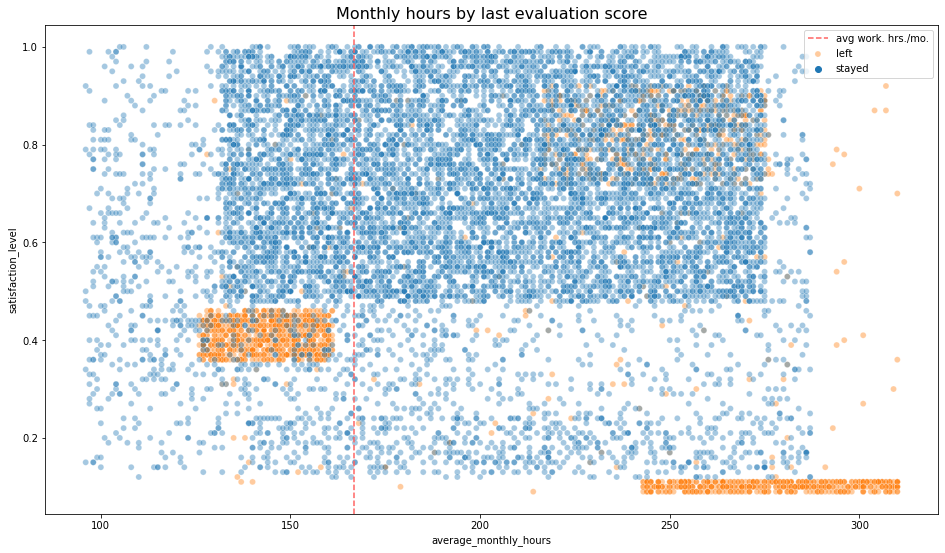

In [17]:
# 50 weeks, 40 hours per week, and 12 months
avg_work_hours = 50 * 40 / 12

# Create scatterplot
plt.figure(figsize=(16,9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=avg_work_hours, color= '#ff6361', label= 'avg work. hrs./mo.', ls = '--')
plt.legend(labels = ['avg work. hrs./mo.', 'left', 'stayed' ])
plt.title('Monthly hours by last evaluation score', fontsize='16')
plt.show()

The scatterplot above illustrates a large group of employees working ~240&ndash;315 hours per month, which could potentially lead to low satisfaction levels, mainly due to extreme working hours (more than 75 hours per week for a year). The group of employees who left had more typical working hours, but had a satisfaction level of around 0.4. Speculatively, pressure from coworkers may have pushed them to work more, which impacted their satisfaction.

In addition, the group that worked ~210&ndash;280 hours per month showed a satisfaction level of ~0.7&ndash;0.9. The peculiar distribution shapes suggest possible data manipulation or synthetic data.

Next, we will visualize worker turnover based on `tenure`.

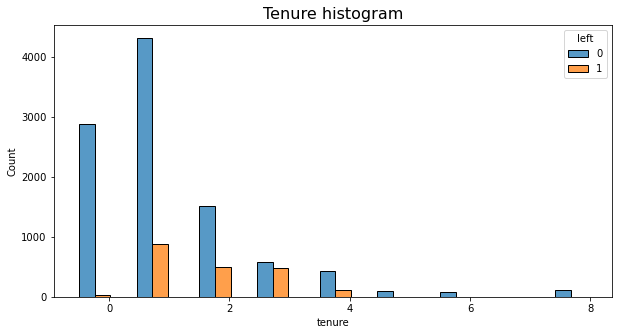

In [18]:
# Create histogram
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=6)
ax.set_title('Tenure histogram', fontsize='16')
plt.show()

Further, it might be interesting to visualize `satisfaction_level` by `tenure`.

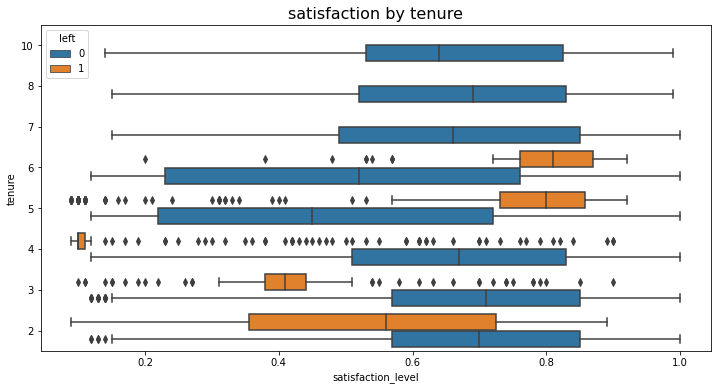

In [19]:
# Create a boxplot

plt.figure(figsize=(12,6))
ax = sns.boxplot(data = df1, x='satisfaction_level', 
                 y='tenure', hue='left', orient='h')
ax.invert_yaxis()
ax.set_title('satisfaction by tenure', fontsize=16)
plt.show()

Several observations can be drawn from this plot:

- Employees who left can be categorized into dissatisfied individuals with shorter tenure and highly satisfied individuals with medium tenure.
- Notably, employees with four years of tenure and who left showed very low levels of satisfaction. Investigating policy changes around the four-year tenure may provide insight.
- Employees with the longest tenure chose to stay, showing similar levels of satisfaction to newly joined employees.
- The histogram highlights the scarcity of employees with long tenure, potentially indicating higher positions and higher salaries.


Going forward, calculating the mean and median satisfaction scores for exiting and staying employees could be the next step of analysis.

In [20]:
df1.groupby(['left'])['satisfaction_level'].agg([np.mean, np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


The mean and median satisfaction scores of employees who left are lower than those of employees who stayed. Interestingly, among employees who stayed, the mean satisfaction score appears to be slightly below the median score. This indicates that satisfaction levels among those who stayed might be skewed to the left.

Next, we could examine salary levels for different tenures.

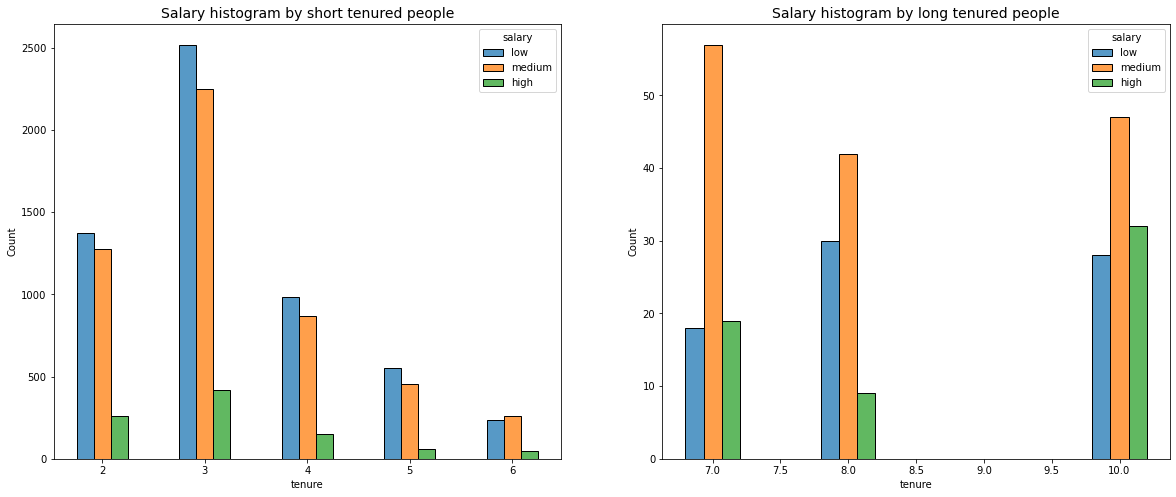

In [21]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (20,8))

# Define short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Define long-tenures employess
tenure_long = df1[df1['tenure'] > 6]

# Plot short-tenured employees
sns.histplot(data=tenure_short, x='tenure',hue='salary', discrete=1,
            hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5,
            ax=ax[0])
ax[0].set_title('Salary histogram by short tenured people', fontsize='14')

sns.histplot(data=tenure_long, x='tenure',hue='salary', discrete=1,
            hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4,
            ax=ax[1])
ax[1].set_title('Salary histogram by long tenured people', fontsize='14');

The plots above show that long-tenured employees were not disproportionately comprised of higher-paid employees. 

For further analysis, it would be useful to investigate the correlation between working longer and receiving a higher evaluation score. We could create a scatterplot of `average_monthly_hours` versus `last_evaluation`.

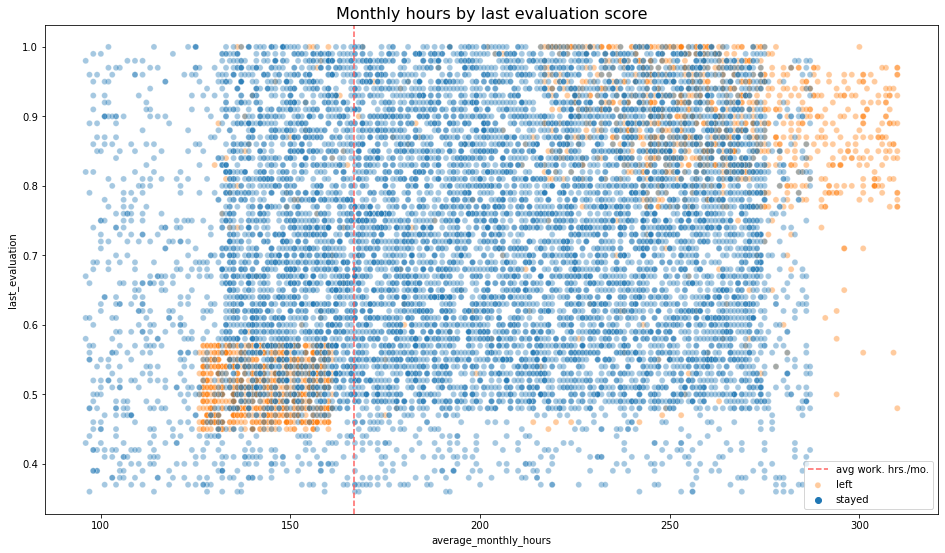

In [22]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=avg_work_hours, color= '#ff6361', label= 'avg work. hrs./mo.', ls = '--')
plt.legend(labels = ['avg work. hrs./mo.', 'left', 'stayed' ])
plt.title('Monthly hours by last evaluation score', fontsize='16')
plt.show()


The scatterplot above yields the following insights:

- Two distinct groups of employees who left are evident: those who were overworked yet performed exceptionally well, and those who worked slightly below the average of ~167 monthly hours and received lower evaluation scores.
- A correlation appears between hours worked and evaluation scores.
- The upper left quadrant has relatively few employees, indicating that extensive hours don't necessarily ensure a favorable evaluation.
- A majority of company employees work significantly more than 167 hours per month.


For the next step, investigating whether employees working exceptionally long hours received promotions within the last five years could provide valuable information.

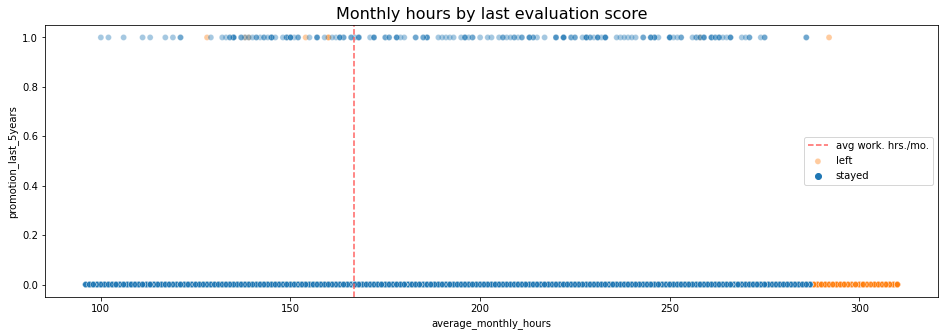

In [23]:
plt.figure(figsize=(16,5))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=avg_work_hours, color= '#ff6361', label= 'avg work. hrs./mo.', ls = '--')
plt.legend(labels = ['avg work. hrs./mo.', 'left', 'stayed' ])
plt.title('Monthly hours by last evaluation score', fontsize='16')
plt.show()

The plot above shows the following:

- There are very few employees who were promoted in the last five years left
- There are very few employees who worked the longest hours were promoted
- All of the employees who left were working the most hours


Next we will inspect how the employees who left are distributed across departments.

In [24]:
df1['department'].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

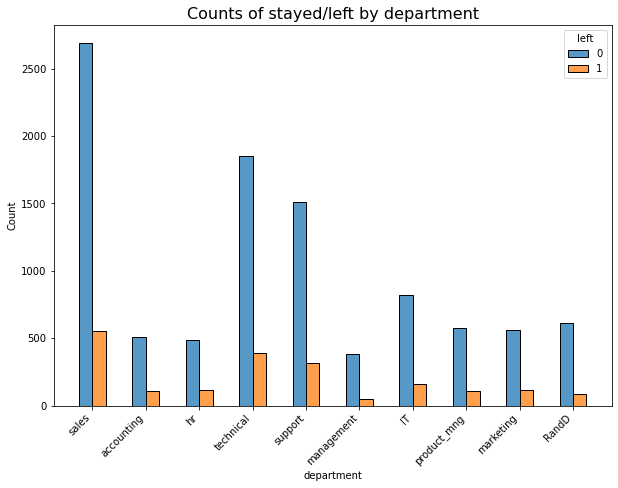

In [25]:
plt.figure(figsize=(10, 7))
ax = sns.histplot(data=df1, x='department', hue='left', multiple='dodge', shrink=.5)
plt.xticks(rotation='45', ha='right')
ax.set_title('Counts of stayed/left by department', fontsize='16')
plt.show()

No department seems to differ significantly in terms of the proportion of employees who left and those who stayed. 

Finally, we can check for strong correlations between the variables in the data.

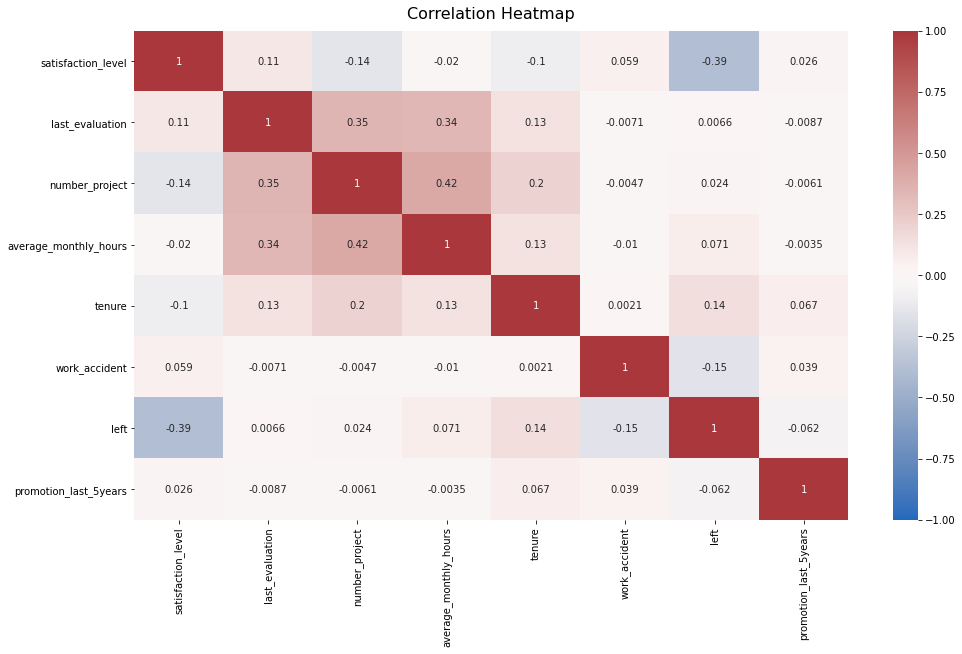

In [26]:
# Plot a correlation heatmap

plt.figure(figsize=(16,9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, 
                      cmap= sns.color_palette('vlag', as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=12)
plt.show()

The correlation heat map reveals that that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

### Insights

It seems that employees are leaving from the company due to issues with how things are being managed. People leaving the company are linked to working longer hours, handling numerous projects, and generally having lower levels of satisfaction. Working long hours without getting promotions or good evaluations can be demotivating. There is a significant group of employees in this company who might be experiencing burnout. Additionally, it's noticeable that employees who have been with the company for more than six years usually choose to stay instead of leaving.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data



####  Logistic Regression model assumptions
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Our aim is to predict whether an employee will leave from the company, which is an outcome that falls into categorical variable. This task falls under the classification category. To be precise, it's a binary classification task because the result, denoted by the variable left, can either be 1 (showing that the employee left) or 0 (showing that the employee didn't leave).

### Identify the types of models most appropriate for this task.

As the variable we intend to predict (employee departure from the company) is categorical, we have two main options: constructing a Logistic Regression model or employing a Tree-based Machine Learning model.

We have the choice to proceed with either of these approaches. Alternatively, we could implement both and assess their performance in comparison.

### Modeling: Logistic Regression Model



Note that binomial logistic regression suits the task because it involves binary classification.

Before splitting the data, encode the non-numeric variables. There are two: `department` and `salary`. 

`department` is a categorical variable, which means we can dummy it for modeling. 

`salary` is categorical too, but it's ordinal. There's a hierarchy to the categories, so it's better not to dummy this column, but rather to convert the levels to numbers, 0&ndash;2.

In [27]:
# Copy the dataframe
df_enc = df1.copy()

# Encode the 'salary' as an ordinal numeric category (convert the levels to numbers 0-2)
df_enc['salary'] = (df_enc['salary'].astype('category')
                   .cat.set_categories(['low', 'medium', 'high'])
                   .cat.codes)

df_enc = pd.get_dummies(df_enc, drop_first=False)

df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


Create heatmap to visualize the correlations among variables. Decide on the specific variables we want to analyze for their correlations.

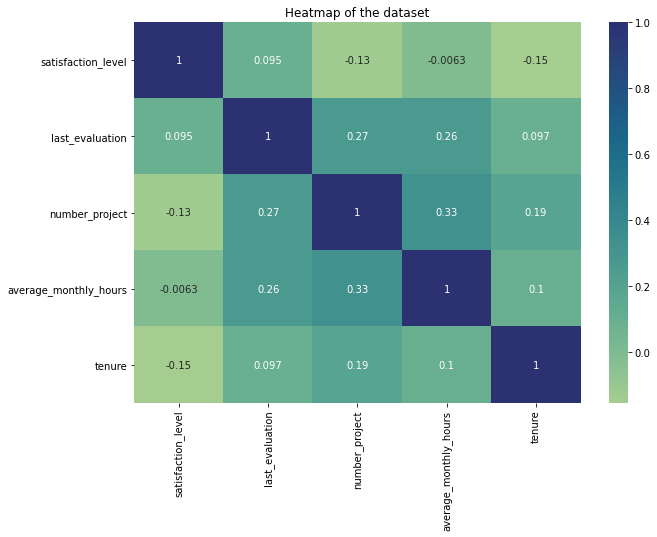

In [28]:
#create a heatmap to visualize how correlated variables are
plt.figure(figsize=(10,7))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours','tenure']]
           .corr(), annot=True, cmap='crest')
plt.title('Heatmap of the dataset')
plt.show()

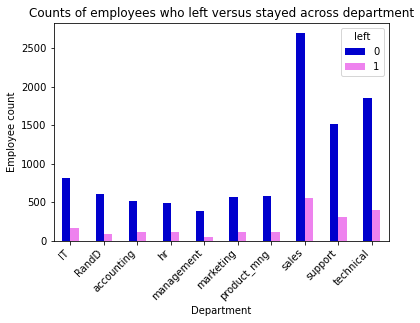

In [29]:
# Create a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't
# In the legend, 0 (blue color) represents employees who did not leave
pd.crosstab(df1['department'], df1['left']).plot(kind='bar', color=['mediumblue', 'violet'])
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.xticks(rotation=45, ha='right')
plt.show()


Since logistic regression is quite sensitive to outliers, it would be a good idea at this stage to remove the outliers in the `tenure` column that were identified earlier.

In [30]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_log_reg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

df_log_reg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


Isolate the outcome variable, which is the variable that we want our model to predict and Select the features we want to use in our model. Consider which variables will help us predict the outcome variable, `left`.

In [31]:
y = df_log_reg['left']

X = df_log_reg.drop('left', axis=1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [32]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                   stratify=y, random_state= 42)

In [33]:
# construct and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [34]:
# get predictions using logistic regression model on the test set
y_pred = log_clf.predict(X_test)

Create a confusion Matrix to visualize the results.

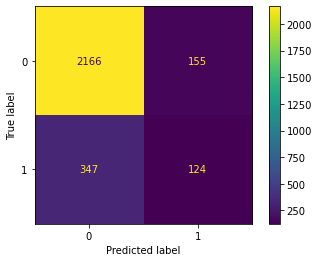

In [35]:
# Confussion Matrix

# Compute values
log_cm = confusion_matrix(y_test, y_pred, labels= log_clf.classes_)

# Create display
log_disp = ConfusionMatrixDisplay(confusion_matrix = log_cm,
                                 display_labels = log_clf.classes_)

# Plot
log_disp.plot(values_format='')

# Display plot
plt.show()

- **True negatives**: The number of people who **didn't leave** that the model **accurately predicted** did not leave. (displayed in the *upper-left quadrant*)

- **False positives**: The number of people who **didn't leave** the model **inaccurately predicted** as leaving. (displayed in the *upper-right quadrant*)

- **False negatives**: The number of people who **left** that the model **inaccurately predicted** did not leave (displayed in the *bottom-left quadrant*)

- **True positives** : The number of people who **left** the model **accurately predicted** as leaving (displayed in the *bottom-right quadrant*)

Then we will create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

Prior to that, we check the class balance in the data. In other words, check the number of values in the `left` column. Since this is a binary classification task, class balance informs how you interpret the accuracy metric.

In [36]:
df_log_reg['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

There is an approximately 83%-17% split. So the data is not perfectly balanced, but it is not too imbalanced. In this case, we can use this data without modifying the class balance and continue evaluating the model.

In [37]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



The classification report above shows that the logistic regression model achieved a **precision of 79%**, **recall of 82%**, **f1-score of 80%** (all weighted averages), and **accuracy of 82%**. 

### Modeling Approach B: Tree-based Model

We will create here Decision Tree and Random Forest.

In [38]:
# Isolate the outcome variable
y = df_enc['left']

y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [39]:
# Select the features
X = df_enc.drop('left', axis=1)

# Display the first few ro
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [40]:
# Split the data into training, validation, and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

#### Decision tree - round 1

Now we will construct a decision tree model and set up cross-validated grid-search to find the best model parameters.

In [41]:
tree_clas = DecisionTreeClassifier(random_state=0)

# Hyperparameters to search over
cv_params = {'max_depth': [4, 6, 8, None],
            'min_samples_leaf': [2, 5, 1],
            'min_samples_split': [2, 4, 6]
            }
# Scoring metrics
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

tree = GridSearchCV(tree_clas, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Fit the decision tree model to the training data.

In [42]:
%%time

tree.fit(X_train, y_train)

CPU times: user 2.03 s, sys: 8.61 ms, total: 2.04 s
Wall time: 2.04 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy', 'roc_auc', 'f1', 'recall', 'precision'})

Identify the best parameters.

In [43]:
tree.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

Identify the best AUC score achieved by the decision tree model on the training set.

In [44]:
tree.best_score_

0.969819392792457

The AUC score nearly reaches 1, which means this is a strong result. The model can predict employees who will leave very well.

In [45]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [46]:
#Get all CV scores
tree_cv_results = make_results('decision tree CV',tree, 'auc')
tree_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree CV,0.914552,0.916949,0.915707,0.971978,0.969819


All of these scores from the decision tree model are strong indicators of good model performance. 

Recall that decision trees can be vulnerable to overfitting, and random forests avoid overfitting by incorporating multiple trees to make predictions. We will construct a random forest model next.

#### Random forest - round 1

In [47]:
rf_clas = RandomForestClassifier(random_state=0)

# Hyperparameters to search over
cv_params = {'max_depth': [3, 5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1],
             'min_samples_leaf': [1, 2, 3],
             'min_samples_split': [2, 3, 4],
             'n_estimators': [300, 500],
             }  
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

rf = GridSearchCV(rf_clas, cv_params, scoring=scoring, cv=4, refit= 'roc_auc')

Fit the random forest model to the training data.

In [49]:
%%time
rf.fit(X_train, y_train) # --> wall time: ~8min

CPU times: user 7min 58s, sys: 3.52 s, total: 8min 2s
Wall time: 8min 3s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'accuracy', 'roc_auc', 'f1', 'recall', 'precision'})

Define a path to the folder to save the model

In [50]:
path = '/Users/tarahanni/Documents/Data/Python/'

Define functions to pickle the model and read in the model.

In [51]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)
        

In [52]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [53]:
# Write pickle
write_pickle(path, rf, 'hr_rf')

In [54]:
# Read pickle
rf = read_pickle(path, 'hr_rf')

Identify the best AUC score achieved by the random forest model on the training set.

In [55]:
rf.best_score_

0.9804250949807172

Identify the best parameters.

In [56]:
rf.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

Collect the evaluation score on the training set for the decision tree and random forest models.

In [57]:
rf_cv_results= make_results('random forest CV', rf, 'auc')
print(tree_cv_results)
print(rf_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree CV   0.914552  0.916949  0.915707  0.971978  0.969819
              model  precision    recall        F1  accuracy       auc
0  random forest CV   0.950023  0.915614  0.932467  0.977983  0.980425


The evaluation scores of the random forest model is only slightly better than that of the decision tree model.

Next, we will evaluate the final model on the test set

Define a function that gets all the scores from a model's predictions.

In [58]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

Now use the best performing model to predict on the test set.

In [59]:
rf_test_scores = get_scores('random forest test', rf, X_test, y_test)
rf_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest test,0.964211,0.919679,0.941418,0.980987,0.956439


The test scores are very similar to the validation scores, which is good. This appears to be a strong model. Since this test set was only used for this model, we can be more confident that our model's performance on this data is representative of how it will perform on new, unseeen data.

### Feature Engineering

We might question the validity of the high evaluation scores, suspecting potential data leakage. Data leakage arises when we utilize data for model training that shouldn't be used, either because it's part of the test data or because it won't be available during real-world deployment. Using leaked data to train a model can result in an unrealistic performance score that doesn't hold up in production.

In this scenario, it's probable that not all employees will have reported satisfaction levels. Moreover, the `average_monthly_hours` column could potentially introduce data leakage. If employees have already decided to leave or have been marked for termination by management, they might be working fewer hours.

The initial decision tree and random forest models included all variables as features. The upcoming phase will involve feature engineering to create more refined models.

To proceed, we should exclude the `satisfaction_level` and develop a new feature that approximates whether an employee is overworked. This new feature could be named `overworked` and it will have binary values.

In [60]:
df2 = df_enc.drop('satisfaction_level', axis=1)
df2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [61]:
# Create `overworked` column. For now, it's identical to average monthly hours.
df2['overworked'] = df2['average_monthly_hours']

# Inspect max and min average monthly hours values
print('Max hours:', df2['overworked'].max())
print('Min hours:', df2['overworked'].min())

Max hours: 310
Min hours: 96


167 is approximately the average number of monthly hours for someone who works 50 weeks per year, 5 days per week, 8 hours per day. 

We will define being overworked as working more than 175 hours per month on average.

In [62]:
# overworked when working more than 175 hours/week
df2['overworked'] = (df2['overworked'] > 175).astype(int)

df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

In [63]:
# Drop the `average_monthly_hours` column
df2 = df2.drop('average_monthly_hours', axis=1)

df2.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [64]:
y = df2['left']

X = df2.drop('left', axis=1)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

#### Decision Tree - Round 2

In [66]:
# Instantiate model
tree_clas = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(tree_clas, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [67]:
%%time

tree1.fit(X_train, y_train)

CPU times: user 1.6 s, sys: 10.4 ms, total: 1.61 s
Wall time: 1.61 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy', 'roc_auc', 'f1', 'recall', 'precision'})

In [68]:
# Check best params
tree1.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [69]:
# Check best AUC score CV
tree1.best_score_

0.9586752505340426

This model performs very well, even without `satisfaction_level` column and detailed hours worked data.

In [70]:
# Get all CV scores
tree1_cv_results = make_results('decision tree1 CV', tree1, 'auc')
print(tree_cv_results)
print(tree1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree CV   0.914552  0.916949  0.915707  0.971978  0.969819
               model  precision    recall        F1  accuracy       auc
0  decision tree1 CV   0.856693  0.903553  0.878882  0.958523  0.958675


A few of the other scores decreased. This outcome is anticipated as we considered fewer features in this model iteration. Nonetheless, the scores are still quite impressive.

In [71]:
tree1_test_scores = get_scores('random forest1 test', tree1, X_test, y_test)
tree1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest1 test,0.783877,0.917671,0.845513,0.944296,0.933635


#### Random Forest - Round 2

In [72]:
rf_clas = RandomForestClassifier(random_state=0)

cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             } 

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

rf1 = GridSearchCV(rf_clas, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [73]:
%%time
rf1.fit(X_train, y_train); # <-- wall time: ~11min

CPU times: user 5min 56s, sys: 1.9 s, total: 5min 58s
Wall time: 5min 58s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'accuracy', 'roc_auc', 'f1', 'recall', 'precision'})

In [74]:
# Write pickle 
write_pickle(path, rf1, 'hr_rf1')

In [75]:
rf1 = read_pickle(path, 'hr_rf1')

In [76]:
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [77]:
rf1_cv_results = make_results('random forest1 CV', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

               model  precision    recall        F1  accuracy       auc
0  decision tree1 CV   0.856693  0.903553  0.878882  0.958523  0.958675
               model  precision    recall        F1  accuracy      auc
0  random forest1 CV   0.866758  0.878754  0.872407  0.957411  0.96481


Again, the scores dropped slightly, but the random forest performs better than the decision tree if using AUC as the deciding metric.

Score the champion model on the test set now.

In [78]:
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest1 test,0.870406,0.903614,0.8867,0.961641,0.938407


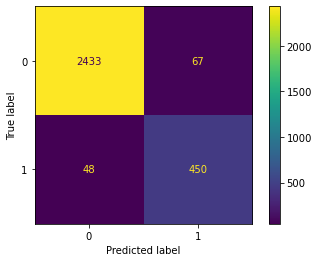

In [79]:
preds = rf1.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf1.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cm, 
                             display_labels = rf1.classes_)

disp.plot(values_format='');


The model predicts a slightly higher number of false positives compared to false negatives, indicating that certain employees might be identified as at risk of quitting or getting fired, when that's actually not the case. Nevertheless, the model remains strong.

For exploratory reasons, we will examine the divisions within the decision tree model and focus on the key features in the random forest model.

#### Decision tree splits

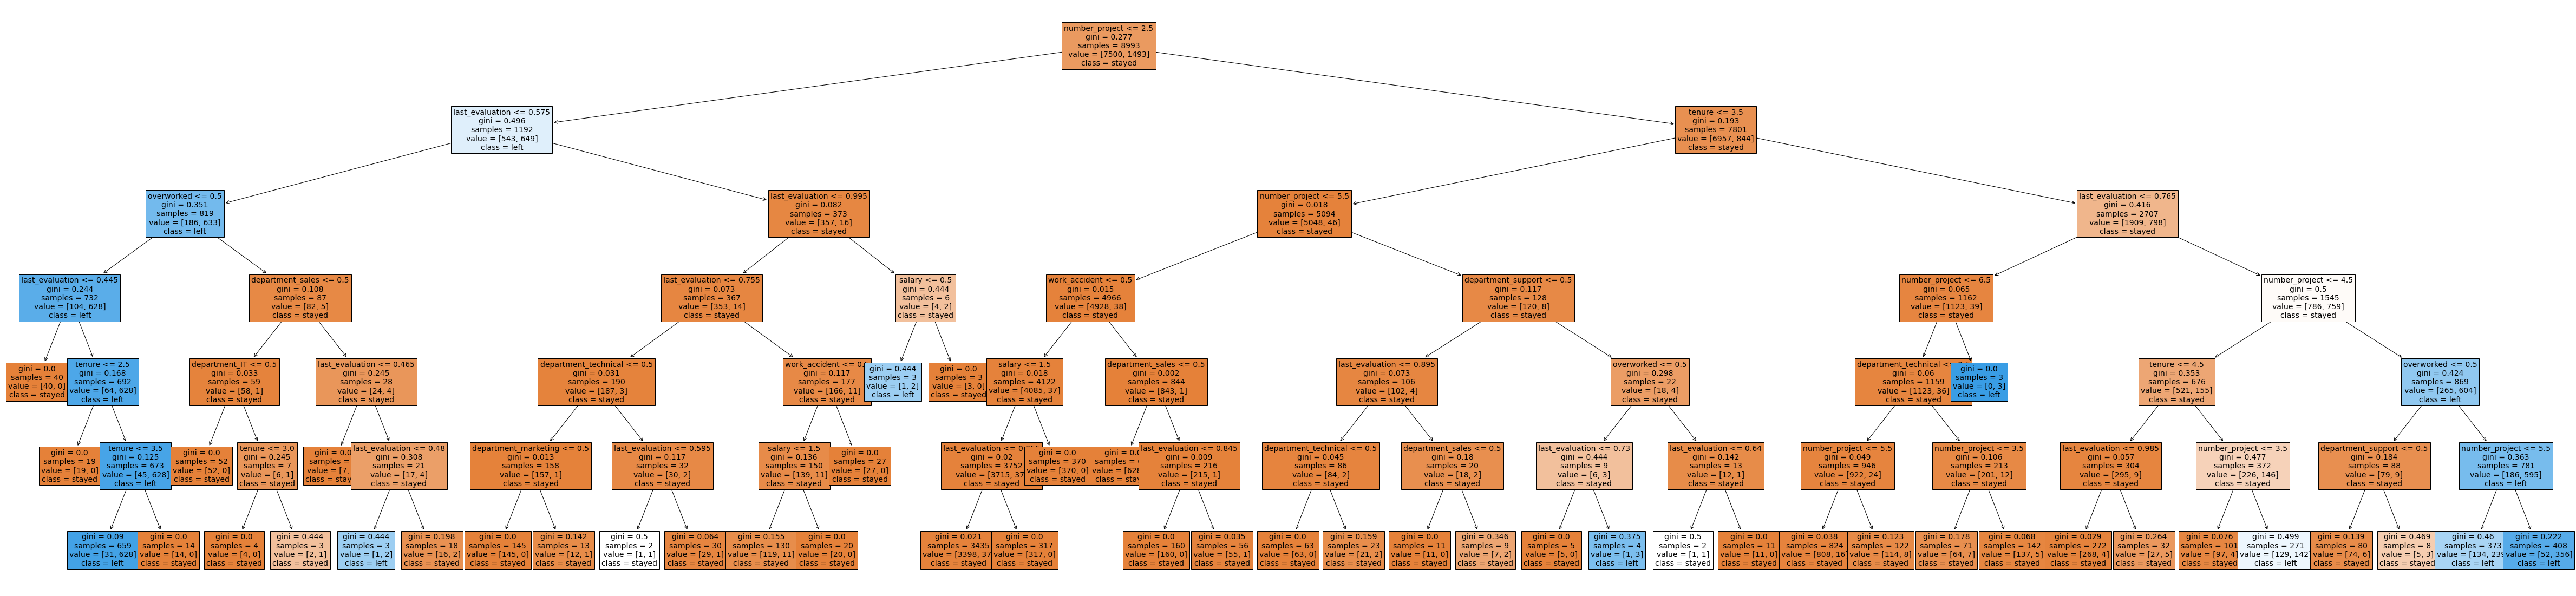

In [80]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree1.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

#### Decision Tree feature importance

In [81]:
tree1_importances = pd.DataFrame(tree1.best_estimator_.feature_importances_,
                                columns=['gini_importance'],
                                index=X.columns
                                )
tree1_importances = tree1_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importance > 0
tree1_importances = tree1_importances[tree1_importances['gini_importance'] != 0]
tree1_importances

,gini_importance
last_evaluation,0.343958
number_project,0.343385
tenure,0.215681
overworked,0.093498
department_support,0.001142
salary,0.000910
department_sales,0.000607
department_technical,0.000418
work_accident,0.000183
department_IT,0.000139


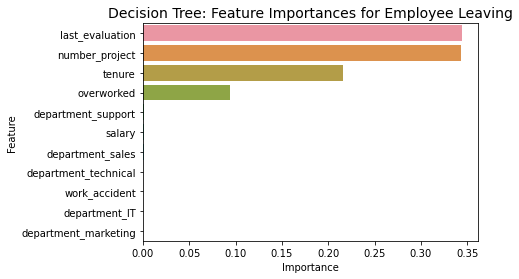

In [82]:
# Create Barplot to visualize the decision tree feature importances
sns.barplot(data=tree1_importances, x="gini_importance", y=tree1_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=14)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The barplot above shows that in this decision tree model, `last_evaluation`, `number_project`, `tenure`, and `overworked` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`.

#### Random forest feature importance

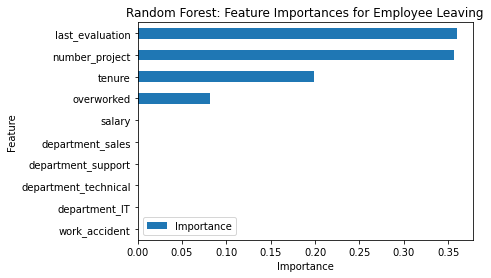

In [83]:
# Get feature importances
feat_impt = rf1.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf1.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

The plot above shows that in this random forest model, `last_evaluation`, `number_project`, `tenure`, and `overworked` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`, and they are the same as the ones used by the decision tree model.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders


## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

**Logistic Regression**

The logistic regression model achieved precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%, on the test set.

**Tree-based Machine Learning**

After conducting feature engineering, the decision tree model achieved AUC of 93.3%, precision of 78.4%, recall of 91.8%, f1-score of 84.6%, and accuracy of 94.4%, on the test set. The random forest  outperformed the decision tree model (AUC of 93.8%, precision of 87.0%, recall of 90.4%, f1-score of 88.7%, and accuracy of 96.2%). 

### Conclusion, Recommendations, Next Steps

The models and the extracted feature importances confirm the issue of overworked employees at the company.

To enhance employee retention, the following recommendations can be presented to stakeholders:

- Set a limit on the number of projects employees can take on.
- Evaluate the possibility of promoting employees who have completed at least four years with the company, or investigate the reasons behind dissatisfaction among four-year tenured employees.
- Provide incentives for longer working hours, or offer flexibility in this regard.
- Ensure employees are aware of the company's overtime pay policies. If expectations about workload and time off are unclear, make them explicit.
- Initiate company-wide and team-level discussions to comprehend and rectify the company's work culture, both universally and in specific contexts.
- Avoid reserving high evaluation scores solely for employees working 200+ hours per month. Adopt a balanced approach to reward effort.

**Next steps:**

Remaining cautious about the possibility of data leakage is reasonable. It would be wise to consider how predictions change when `last_evaluation` is removed from the data.  If evaluations occur infrequently, having the ability to predict employee retention without relying on this feature could be valuable. Additionally, it's worth considering the scenario where evaluation scores influence whether an employee leaves or stays. In such cases, exploring the prediction of performance scores could be beneficial. The same approach could apply to satisfaction scores.